# Ensemble Models Continued

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

## Review: Random Forest Regression

In the previous section we considered random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the ``RandomForestRegressor``, and the syntax is very similar to what we saw earlier.

Consider the following data, drawn from the combination of a fast and slow oscillation:

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
boston = load_boston()

Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target,
                                                random_state=0)

forest = RandomForestRegressor(n_estimators=200)
formodel = forest.fit(Xtrain, ytrain)
formodel.score(Xtest, ytest)


0.8019328636609875

# Parameters of Interest for Random Forest Models

 - n_estimators:
     - Number of trees to generate for model

 - max_depth:
     - tunes the number of times internal nodes are split.  (i.e.-tree size)

 - max_features:
     - Number of randomly selected features per split.

 - criterion:
     - 'gini' or 'entropy' for classification and 'mse' for regression

 - min_samples_leaf:
     - set threshold for minimum number of observations per terminal node.  (also a tree size parameter)

 - oob_score:
     - returns out of bag score in model fit object.  Extract result by printing the 'estimators_features_' from model fit object. 

# Extract important variables from model fit object

In [5]:
# Feature importance on a 0 to 1 normalized scale can be extracted from tree models:

print(formodel.feature_importances_)  
#in same order as feature names in data
boston.feature_names # RM is most important variable in model.  Variable measures the Number of rooms.

[0.03567772 0.0010665  0.00756334 0.00081884 0.01916037 0.39558703
 0.01313396 0.0372577  0.00321391 0.01922959 0.02197849 0.01083206
 0.43448049]


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

# Gradient Boosted Trees

In [6]:
#Regression model example first...

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target,
                                                random_state=0)

model = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=.01)
modelfit = model.fit(Xtrain,ytrain)
print(modelfit)
print(modelfit.score(Xtest, ytest))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
0.6548088887834213


## GB learns slowly.  Need more trees

In [8]:
model = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=.01) # 200 trees to 20000
modelfit = model.fit(Xtrain,ytrain)

print(modelfit.score(Xtest, ytest)) 

0.6544793849115871


## learning_rate affects how fast you train model.  Also a tuning parameter

In [27]:
model = GradientBoostingRegressor(n_estimators=20000, max_depth=2, learning_rate=.001) # .01 to .001
modelfit = model.fit(Xtrain,ytrain)

print(modelfit.score(Xtest, ytest)) 

0.7519369270059775


## Parameters of interest...

n_estimators:
    The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators; 

max_depth:
    The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf 
    nodes via max_leaf_nodes. 

max_leaf_nodes:
    The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf 
    nodes via max_leaf_nodes. 
  
learning_rate:

The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage .

In [ ]:
# Gradient boosted classification trees follow the same syntax

In [38]:
from sklearn.datasets import make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier

#make some data
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=.01,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.92

In [39]:
# As with other tree models we can extract important features:

clf.feature_importances_  

array([0.1008, 0.0988, 0.1119, 0.1001, 0.1018, 0.097 , 0.094 , 0.0975,
       0.1054, 0.0927])

# Making predictions from and ensemble of ensemble classification models:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

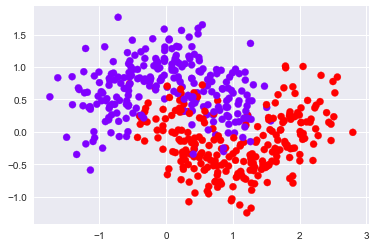

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [23]:
# 1. Build multiple classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Generally works better if models you choose have diverse methodological approaches...

log_clf = LogisticRegression(random_state=42) # logistic regression w/ C=default
rnd_clf = RandomForestClassifier(random_state=42) # Random Forest
svm_clf = SVC(random_state=42) # support vector machine


In [24]:
# Goal is to predict ytest for each model and then use PREDICTIONS FROM EACH MODEL to select final predictions

# Need to set up a standard for selecting final prediction:
from sklearn.ensemble import VotingClassifier

# Estimator arge is giving each estimator a name for references in functions like GridsearchCV

# voting='hard' takes majority vote of each predicted value to select final prediction for ytest

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard') 

In [28]:
vmodel = voting_clf.fit(X_train, y_train)
print(vmodel.score(X_test, y_test)) #return accuracy of voting classifier

0.896


C:\Users\Michael Parrott\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
# Compare to accuracy of individual models...
log_clf = LogisticRegression(random_state=42) # logistic regression w/ C=default
rnd_clf = RandomForestClassifier(random_state=42) # Random Forest
svm_clf = SVC(random_state=42) # support vector machine

print(log_clf.fit(X_train, y_train).score(X_test, y_test))
print(rnd_clf.fit(X_train, y_train).score(X_test, y_test))
print(svm_clf.fit(X_train, y_train).score(X_test, y_test))


0.864
0.872
0.888


Looks like we improved on these models using the ensemble approach!!

In [ ]:
# 'soft' voting takes the predicted probabilities of each model and choose the highest value#

In [33]:
#Need to ensure that probabilities are generated in each model...

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [34]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft') 

vmodel = voting_clf.fit(X_train, y_train)


In [35]:
print(vmodel.score(X_test, y_test)) #return accuracy of voting classifier

0.912


C:\Users\Michael Parrott\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
# We do even better with a soft voting approach

# Can you build a voting classifier on the following dataset?

In [45]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

